Data Mining CP-02


Team-14: Deep Miners

Dataset: [Malware Detection in Network Traffic Data](https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sumuk\OneDrive\Desktop\net_data\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv")
len(df)

1008748

In [3]:
df = df['ts|uid|id.orig_h|id.orig_p|id.resp_h|id.resp_p|proto|service|duration|orig_bytes|resp_bytes|conn_state|local_orig|local_resp|missed_bytes|history|orig_pkts|orig_ip_bytes|resp_pkts|resp_ip_bytes|tunnel_parents|label|detailed-label'].str.split('|', expand=True)

# Rename the columns if needed
df.columns = ["ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto", "service", "duration", "orig_bytes", "resp_bytes", "conn_state", "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "tunnel_parents", "label", "detailed-label"]

In [4]:
df['label'].value_counts() / len(df)

Malicious    0.534795
Benign       0.465205
Name: label, dtype: float64

In [5]:
print(df['label'].unique())

['Malicious' 'Benign']


## EDA

In [9]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1525879831.015811,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan
1,1525879831.025055,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan
2,1525879831.045045,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan
3,1525879832.016240,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan
4,1525879832.024985,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan


In [10]:
df.dtypes

ts                object
uid               object
id.orig_h         object
id.orig_p         object
id.resp_h         object
id.resp_p         object
proto             object
service           object
duration          object
orig_bytes        object
resp_bytes        object
conn_state        object
local_orig        object
local_resp        object
missed_bytes      object
history           object
orig_pkts         object
orig_ip_bytes     object
resp_pkts         object
resp_ip_bytes     object
tunnel_parents    object
label             object
detailed-label    object
dtype: object

In [13]:
# Convert the 'orig_ip_bytes' column to integer
df['orig_ip_bytes'] = df['orig_ip_bytes'].astype(float)
df['resp_ip_bytes'] = df['resp_ip_bytes'].astype(float)
df['orig_pkts'] = df['orig_pkts'].astype(float)
df['resp_pkts'] = df['resp_pkts'].astype(float)

<AxesSubplot:xlabel='label', ylabel='count'>

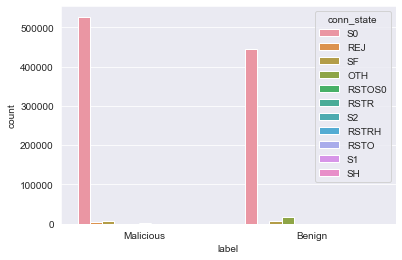

In [14]:
sns.countplot(data=df, x='label', hue='conn_state')

<AxesSubplot:xlabel='label', ylabel='count'>

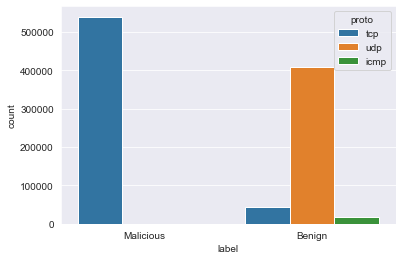

In [15]:
sns.countplot(data=df, x='label', hue='proto')

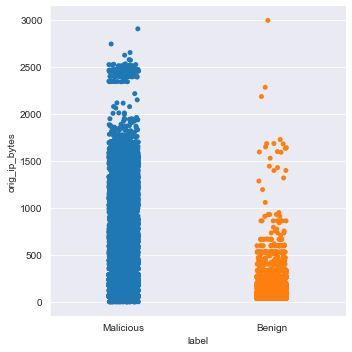

In [16]:
sns.catplot(data=df, x='label', y='orig_ip_bytes')

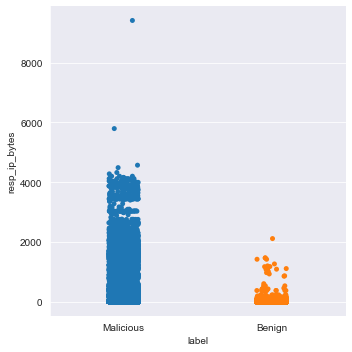

In [17]:
sns.catplot(data=df, x='label', y='resp_ip_bytes')

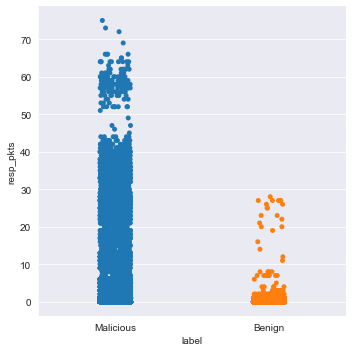

In [20]:
sns.catplot(data=df, x='label', y='resp_pkts')

Model

In [21]:
# keeping only relevent and correlated columns
df = df[['proto', 'history', 'resp_ip_bytes', 'orig_pkts', 'resp_pkts', 'orig_ip_bytes', 'id.resp_p', 'label']]

In [22]:
# remove duplicate rows
df = df.drop_duplicates()
df.shape

(105639, 8)

In [25]:
df.nunique()

proto                3
history            126
resp_ip_bytes     1141
orig_pkts           54
resp_pkts           69
orig_ip_bytes     1249
id.resp_p        75844
label                2
dtype: int64

In [26]:
# perform label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['proto'] = le.fit_transform(df['proto'])
df['history'] = le.fit_transform(df['history'])
df['label'] = le.fit_transform(df['label'])
df.head()

,proto,history,resp_ip_bytes,orig_pkts,resp_pkts,orig_ip_bytes,id.resp_p,label
0,1,22,0.0,3.0,0.0,180.0,23,1
1,1,22,0.0,1.0,0.0,60.0,23,1
6,1,22,0.0,3.0,0.0,180.0,49560,0
7,1,22,0.0,1.0,0.0,60.0,21288,0
9,1,22,0.0,1.0,0.0,60.0,8080,1


In [27]:
df.dtypes

proto              int64
history            int64
resp_ip_bytes    float64
orig_pkts        float64
resp_pkts        float64
orig_ip_bytes    float64
id.resp_p         object
label              int64
dtype: object

Trained an SVM Model, and performed hyperparameter tuning to improve the performance of the model.

In [28]:
# train model user 'label' as target with use of SVM
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.svm import SVC

model = SVC(C=0.5)
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20504     0]
 [   98   526]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20504
           1       1.00      0.84      0.91       624

    accuracy                           1.00     21128
   macro avg       1.00      0.92      0.96     21128
weighted avg       1.00      1.00      1.00     21128


In [29]:
model = SVC(C=0.3)
model.fit(X_train, y_train)

# evaluate model
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20504     0]
 [  105   519]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20504
           1       1.00      0.83      0.91       624

    accuracy                           1.00     21128
   macro avg       1.00      0.92      0.95     21128
weighted avg       1.00      1.00      0.99     21128


In [30]:
model = SVC()
model.fit(X_train, y_train)

# evaluate model
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20504     0]
 [   95   529]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20504
           1       1.00      0.85      0.92       624

    accuracy                           1.00     21128
   macro avg       1.00      0.92      0.96     21128
weighted avg       1.00      1.00      1.00     21128


Trained a KNN Model and obtained a better recall than the SVM Model.

In [31]:
# now train a model using knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# evaluate model
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20503     1]
 [   11   613]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20504
           1       1.00      0.98      0.99       624

    accuracy                           1.00     21128
   macro avg       1.00      0.99      1.00     21128
weighted avg       1.00      1.00      1.00     21128


SVM gives more false negative, hence it is a problem for our dataset. KNN gives less false negative which is better.

Because our positive label is Malicious data.

## Hyperparameter Tuning and Grid Search

Now, we will implement hyperparameter tuning for our KNN model using GridSearchCV.

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize a KNN classifier
knn = KNeighborsClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

After the grid search has been fitted to the training data, we can inspect the best parameters and the performance of the best model.

In [33]:

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Predictions with the best estimator
y_pred_best = best_knn.predict(X_test)

# Evaluation
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
best_class_report = classification_report(y_test, y_pred_best)

print("Confusion Matrix of the best estimator:", best_conf_matrix)
print("\nClassification Report of the best estimator:\n", best_class_report)


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Confusion Matrix of the best estimator: [[20497     7]
 [    4   620]]

Classification Report of the best estimator:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20504
           1       0.99      0.99      0.99       624

    accuracy                           1.00     21128
   macro avg       0.99      1.00      1.00     21128
weighted avg       1.00      1.00      1.00     21128
